In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loadin the data

In [33]:
data = pd.read_csv("../data/mldata.csv")
data = data.drop("Interested Type of Books", axis=1)

In [34]:
data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Technical,hard worker,yes,no,Applications Developer


In [35]:
print(data.columns.tolist())

['Logical quotient rating', 'hackathons', 'coding skills rating', 'public speaking points', 'self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6901 entries, 0 to 6900
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Logical quotient rating              6901 non-null   int64 
 1   hackathons                           6901 non-null   int64 
 2   coding skills rating                 6901 non-null   int64 
 3   public speaking points               6901 non-null   int64 
 4   self-learning capability?            6901 non-null   object
 5   Extra-courses did                    6901 non-null   object
 6   certifications                       6901 non-null   object
 7   workshops                            6901 non-null   object
 8   reading and writing skills           6901 non-null   object
 9   memory capability score              6901 non-null   object
 10  Interested subjects                  6901 non-null   object
 11  interested career area               6901 n

In [37]:
data.dropna(inplace=True)

In [38]:
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

categorical_cols= data.select_dtypes(include=['object']).columns.tolist()

print("\nList of Categorical features: \n" , categorical_cols )


List of Categorical features: 
 ['self-learning capability?', 'Extra-courses did', 'certifications', 'workshops', 'reading and writing skills', 'memory capability score', 'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Taken inputs from seniors or elders', 'Management or Technical', 'hard/smart worker', 'worked in teams ever?', 'Introvert', 'Suggested Job Role']


In [39]:
data

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,5,0,6,2,yes,no,information security,testing,poor,poor,programming,testing,BPA,no,Management,smart worker,yes,no,Applications Developer
1,7,6,4,3,no,yes,shell programming,testing,excellent,medium,Management,system developer,Cloud Services,yes,Technical,hard worker,no,yes,Applications Developer
2,2,3,9,1,no,yes,information security,testing,excellent,poor,data engineering,Business process analyst,product development,yes,Technical,smart worker,no,no,Applications Developer
3,2,6,3,5,no,yes,r programming,database security,excellent,poor,networks,testing,Testing and Maintainance Services,yes,Management,smart worker,yes,yes,Applications Developer
4,2,0,3,4,yes,no,distro making,game development,excellent,medium,Software Engineering,system developer,BPA,no,Technical,hard worker,yes,no,Applications Developer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,7,5,6,2,yes,no,shell programming,hacking,poor,poor,Software Engineering,testing,Testing and Maintainance Services,yes,Management,smart worker,no,yes,Web Developer
6897,6,5,1,8,no,no,machine learning,hacking,excellent,excellent,programming,testing,Testing and Maintainance Services,no,Management,hard worker,no,no,Web Developer
6898,5,1,6,7,yes,no,distro making,data science,poor,poor,IOT,system developer,Cloud Services,yes,Technical,hard worker,yes,no,Web Developer
6899,1,6,4,6,no,no,app development,game development,poor,excellent,data engineering,developer,SAaS services,no,Technical,smart worker,no,yes,Web Developer


In [40]:
Dict={}
for i in data[categorical_cols]:
    data[i] = data[i].astype('category')
    data[i+"_code"] = data[i].cat.codes
    
    Dict[i]={}
    for j in range(0,len(data.axes[0])):
        Dict[i][data[i].iloc[j]] = data[i+"_code"].iloc[j]
    data[i]= data[i+"_code"]
    data= data.drop(i+"_code", axis=1)
        
print(Dict) 

{'self-learning capability?': {'yes': 1, 'no': 0}, 'Extra-courses did': {'no': 0, 'yes': 1}, 'certifications': {'information security': 4, 'shell programming': 8, 'r programming': 7, 'distro making': 1, 'machine learning': 5, 'full stack': 2, 'hadoop': 3, 'app development': 0, 'python': 6}, 'workshops': {'testing': 6, 'database security': 2, 'game development': 3, 'data science': 1, 'system designing': 5, 'hacking': 4, 'cloud computing': 0, 'web technologies': 7}, 'reading and writing skills': {'poor': 2, 'excellent': 0, 'medium': 1}, 'memory capability score': {'poor': 2, 'medium': 1, 'excellent': 0}, 'Interested subjects': {'programming': 9, 'Management': 2, 'data engineering': 5, 'networks': 7, 'Software Engineering': 3, 'cloud computing': 4, 'parallel computing': 8, 'IOT': 1, 'Computer Architecture': 0, 'hacking': 6}, 'interested career area ': {'testing': 5, 'system developer': 4, 'Business process analyst': 0, 'security': 3, 'developer': 2, 'cloud computing': 1}, 'Type of company

In [41]:
from sklearn.model_selection import train_test_split

target = "Suggested Job Role"
X=data.drop([target], axis=1)
y=data[target]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
train_data = X_train.join(y_train)

In [44]:
train_data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?,Extra-courses did,certifications,workshops,reading and writing skills,memory capability score,Interested subjects,interested career area,Type of company want to settle in?,Taken inputs from seniors or elders,Management or Technical,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
6361,6,2,6,1,1,1,4,1,0,2,1,5,4,1,0,0,1,1,11
1310,1,1,5,2,1,1,6,1,2,1,5,4,6,0,0,1,0,1,2
857,9,1,3,6,0,1,7,2,1,1,2,2,8,1,1,1,1,0,1
1664,8,0,7,5,1,1,3,2,2,1,7,5,4,1,1,0,1,0,2
5683,4,0,4,6,1,1,6,7,0,0,2,5,6,1,0,1,1,1,9


<Axes: >

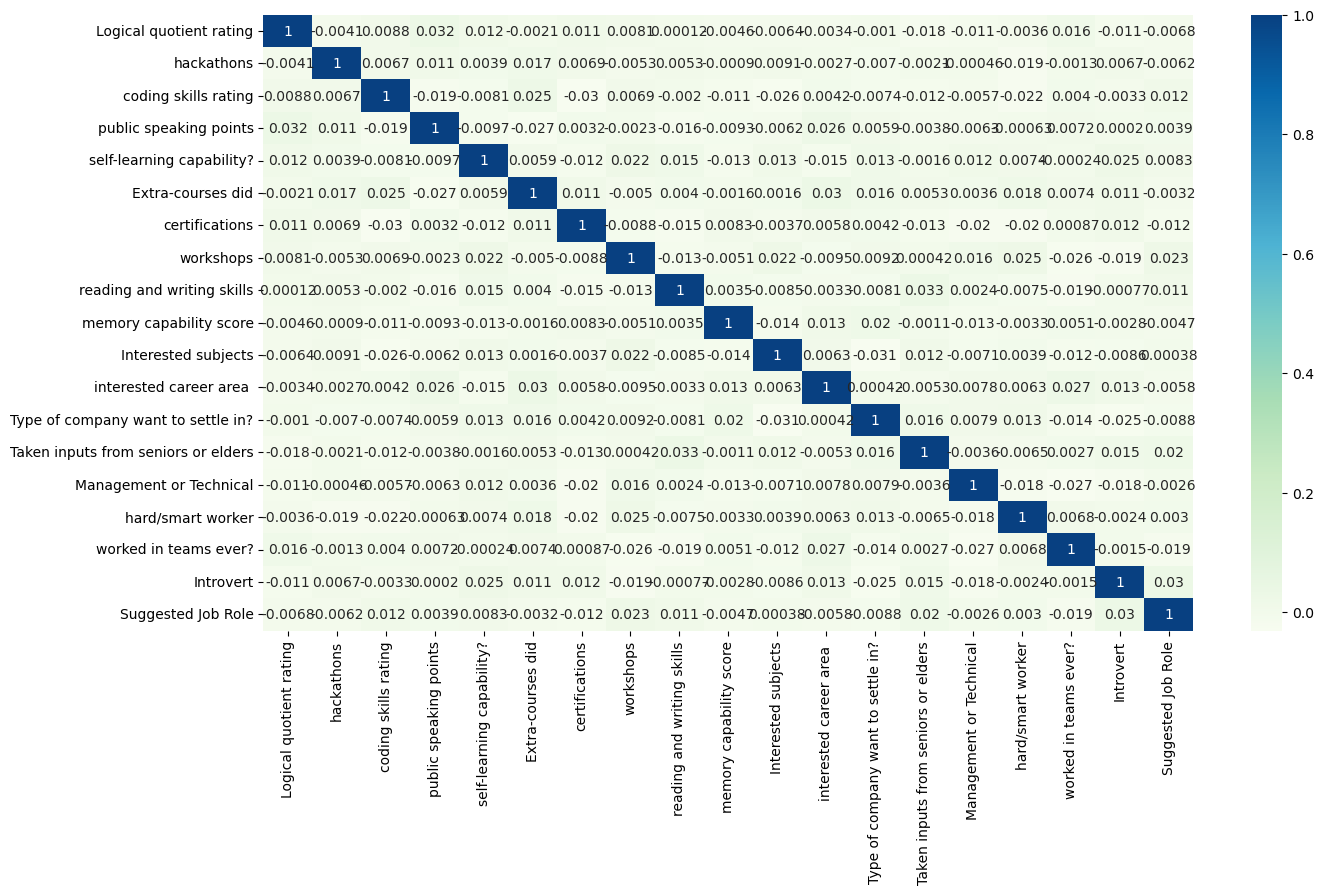

In [45]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="GnBu")

<Axes: xlabel='Logical quotient rating', ylabel='coding skills rating'>

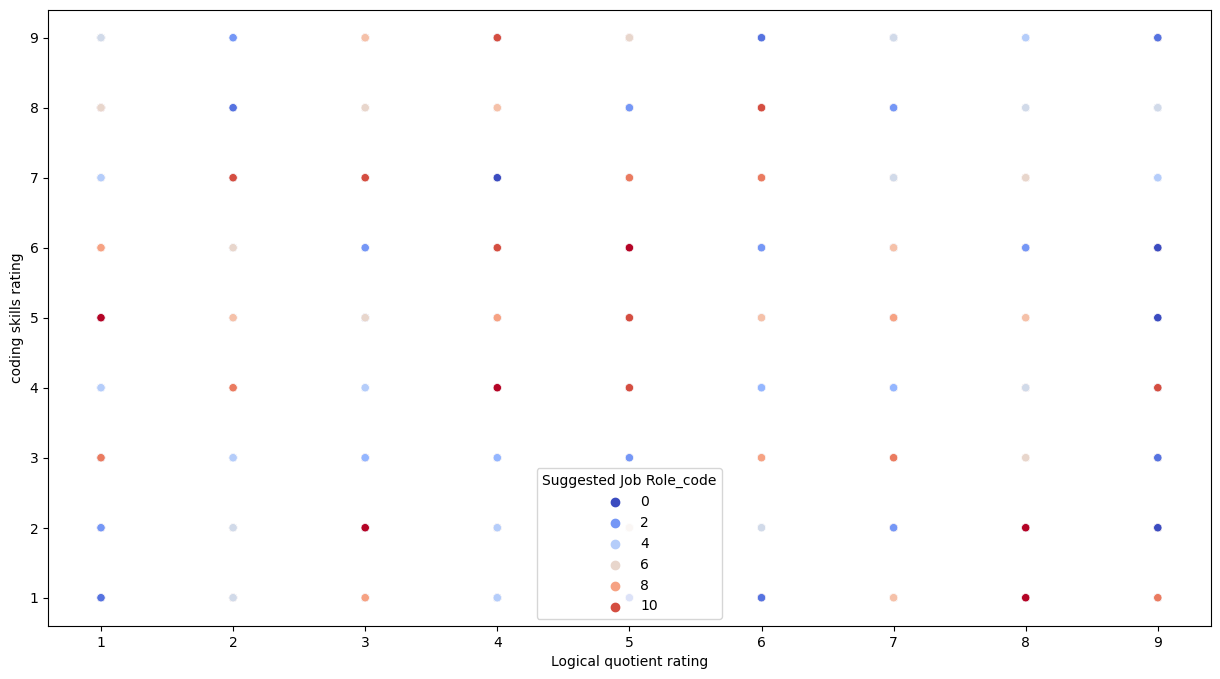

In [15]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="Logical quotient rating", y="coding skills rating", data=train_data, hue=target, palette="coolwarm")

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score

scaler = StandardScaler()

X_train, y_train = train_data.drop([target], axis=1), train_data[target]
X_train_s = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train_s, y_train)


LinearRegression()

In [17]:
test_data = X_test.join(y_test)
X_test, y_test = test_data.drop([target], axis=1), test_data[target]

test_data.head()

,Logical quotient rating,hackathons,coding skills rating,public speaking points,self-learning capability?_code,Extra-courses did_code,certifications_code,workshops_code,reading and writing skills_code,memory capability score_code,Interested subjects_code,interested career area _code,Type of company want to settle in?_code,Taken inputs from seniors or elders_code,Management or Technical_code,hard/smart worker_code,worked in teams ever?_code,Introvert_code,Suggested Job Role_code
4197,7,6,5,2,0,0,5,1,2,1,4,1,0,0,1,0,1,1,7
4738,7,2,8,3,0,1,0,1,0,2,7,5,2,0,1,0,1,0,8
6079,1,0,5,6,0,1,0,5,0,2,8,3,4,1,0,0,1,1,10
47,7,4,2,8,1,0,0,4,2,2,4,0,8,0,0,0,0,1,0
6346,2,5,5,9,0,1,7,2,1,0,8,1,4,0,0,1,0,0,11


In [18]:
X_test_s = scaler.transform(X_test)

reg.score(X_test_s, y_test)

0.00015114270900606908

In [19]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
forest.score(X_test, y_test)

-0.026263405468964107

In [21]:
from sklearn.model_selection import GridSearchCV

forest=RandomForestRegressor(random_state=10, n_estimators =5)

forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=10)

In [22]:
forest.score(X_test, y_test)

-0.23727454629531564

In [23]:
y_predict = forest.predict(X_test)

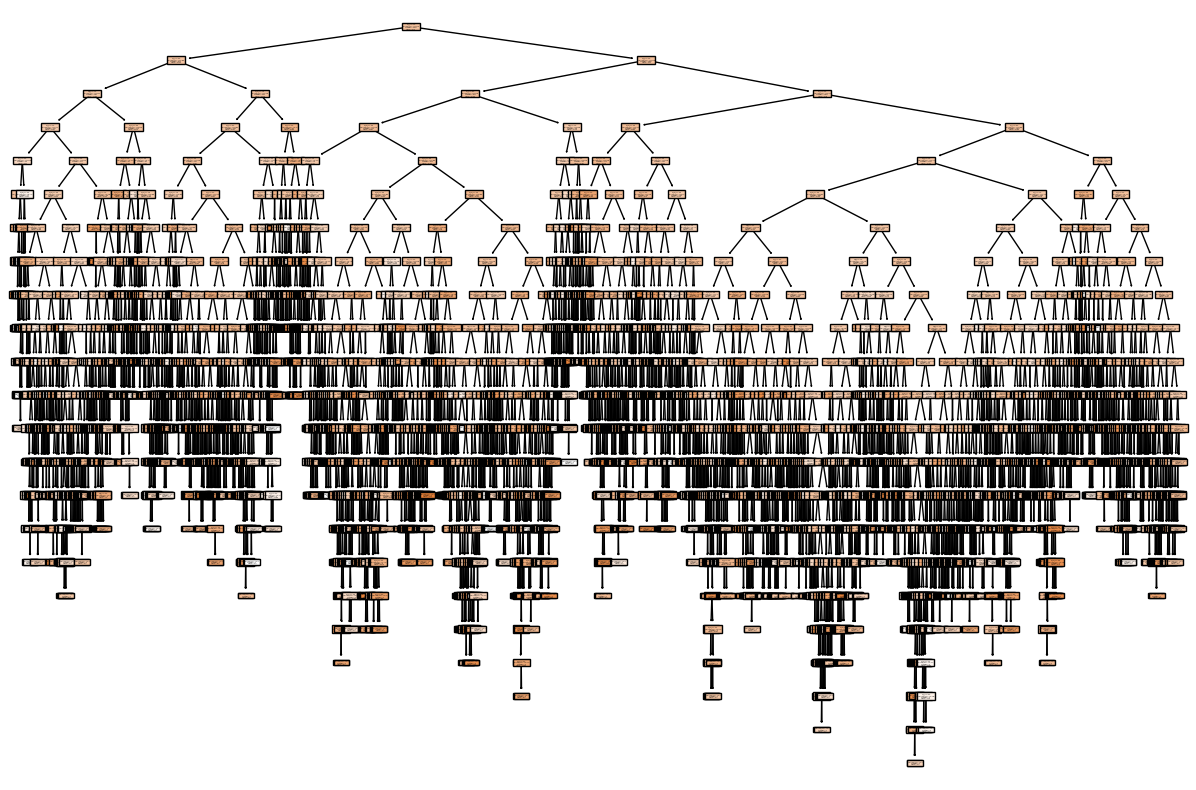

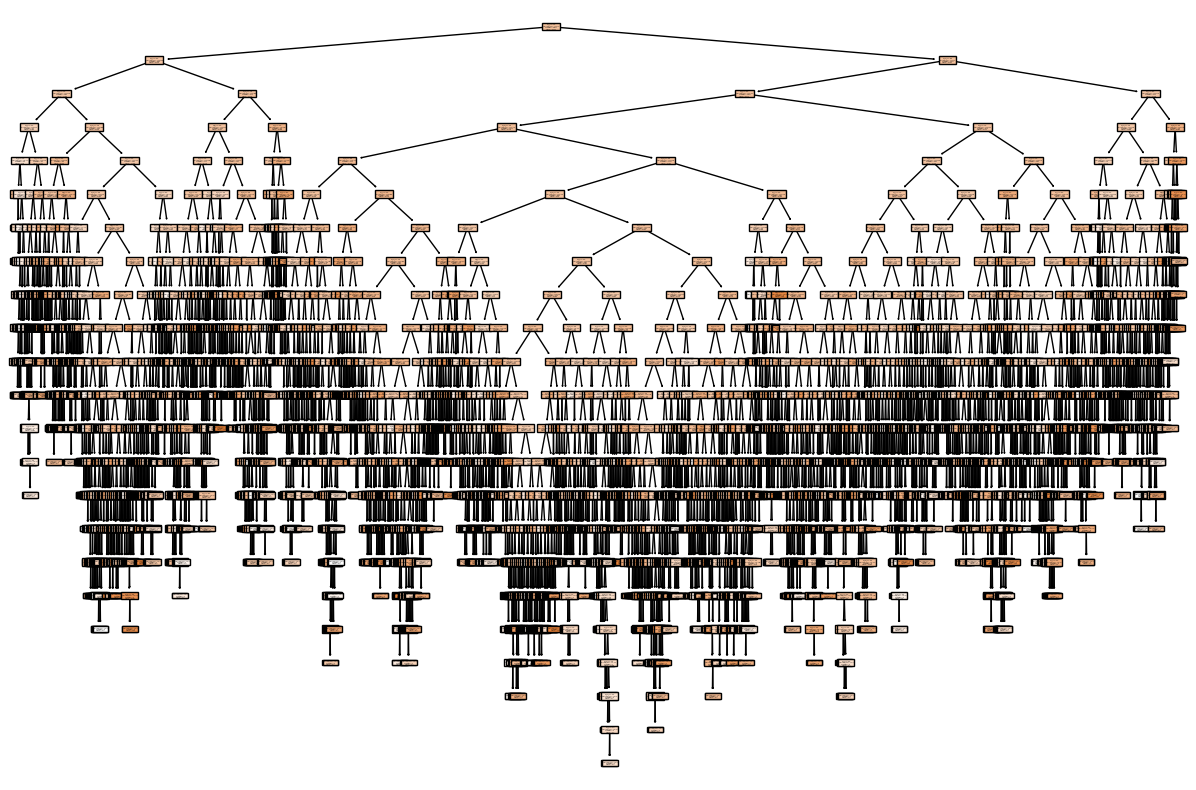

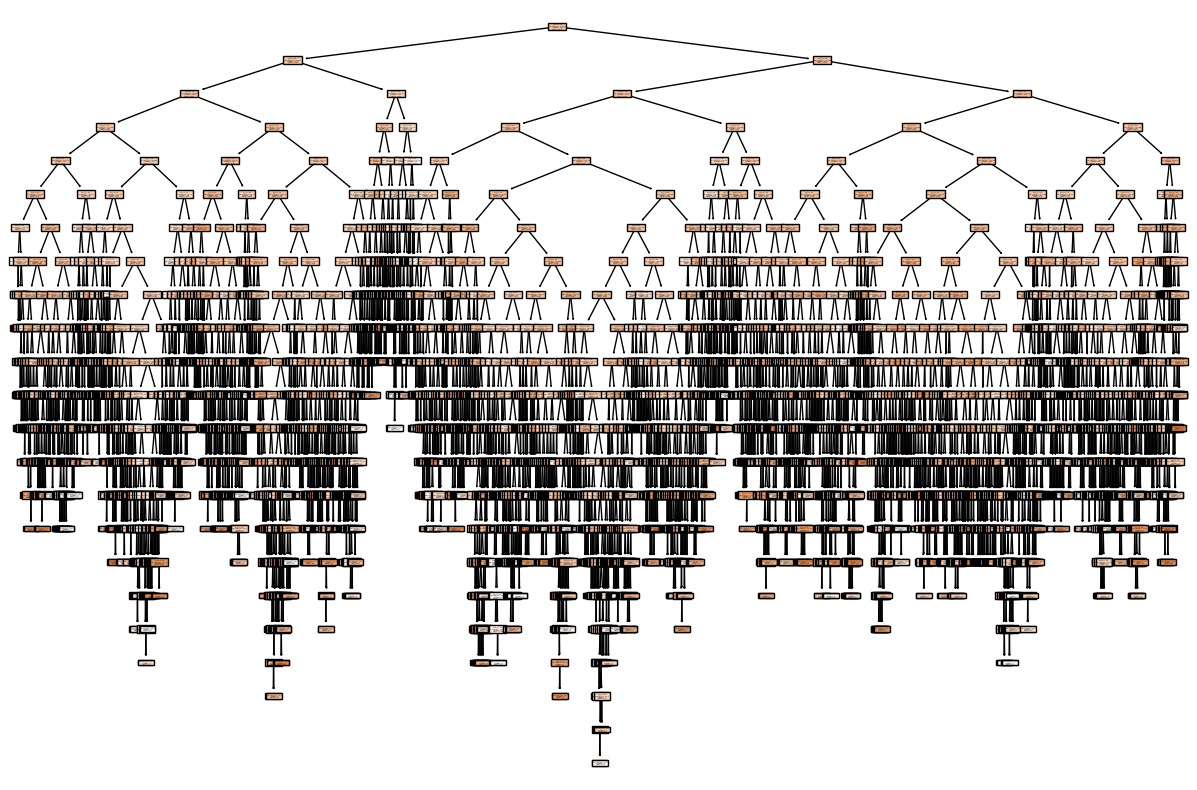

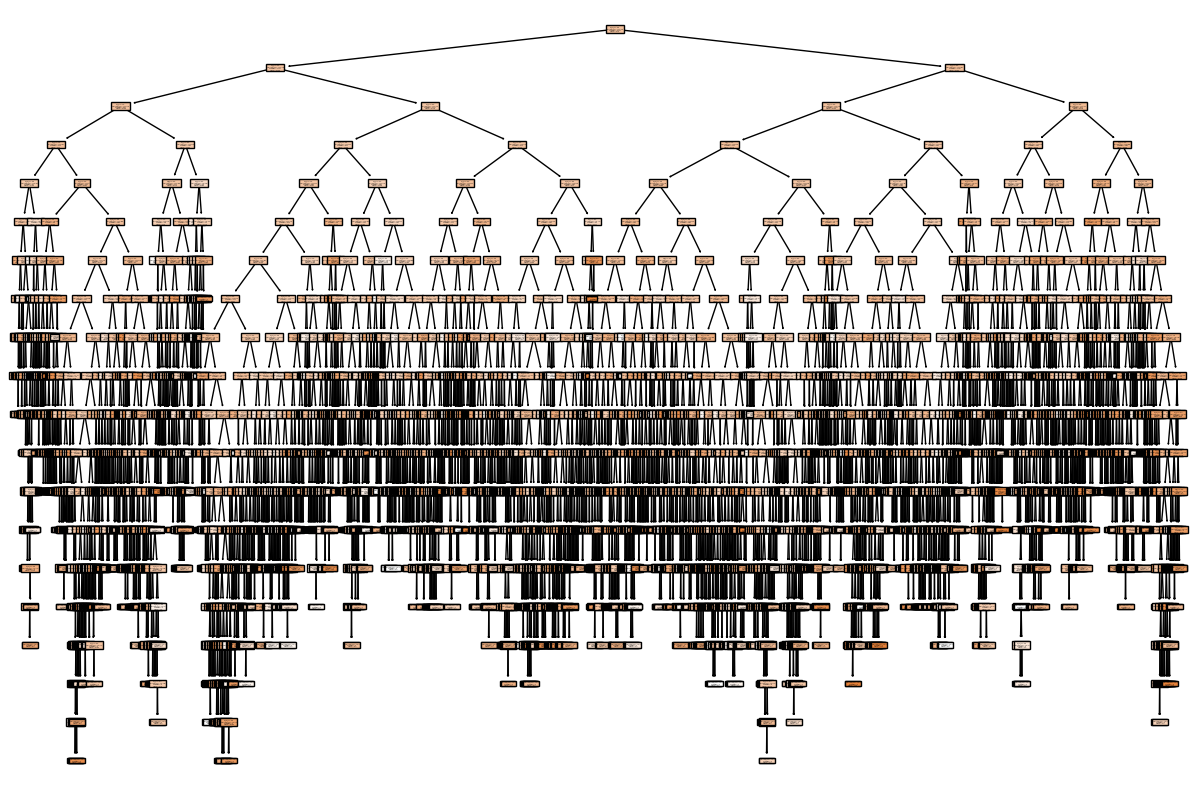

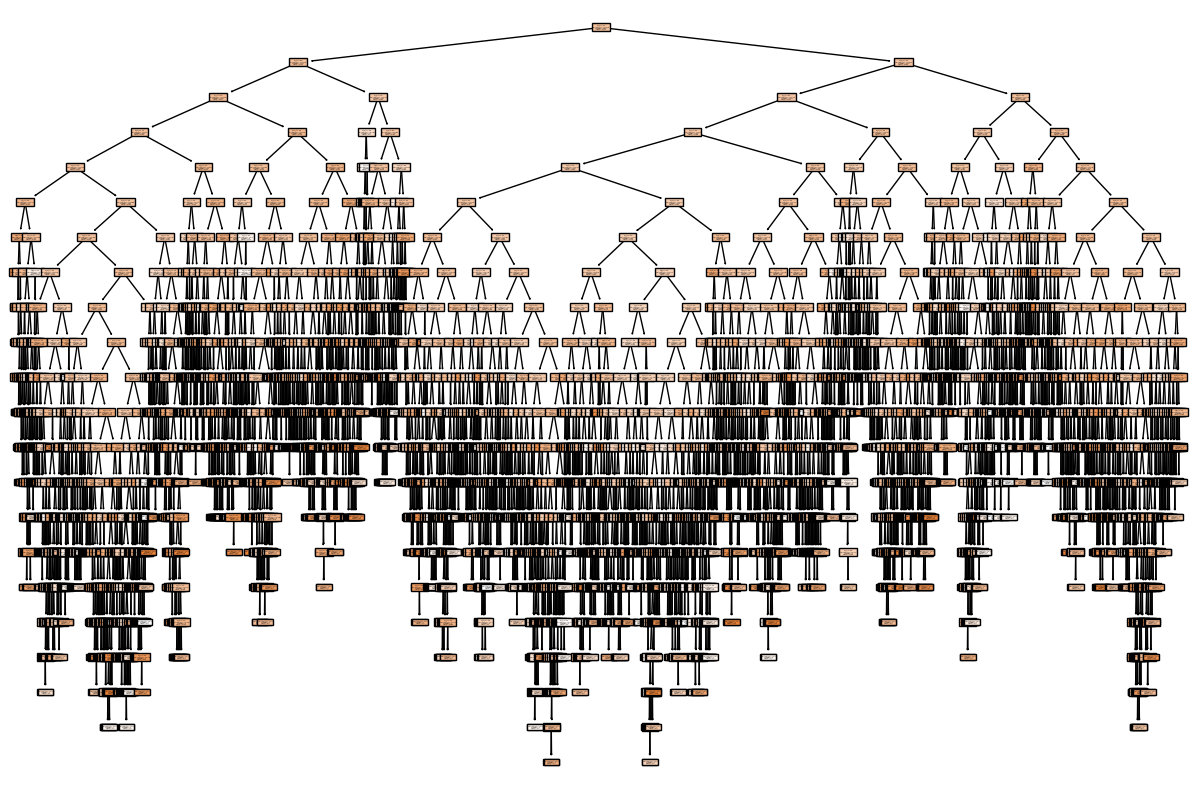

In [24]:
from sklearn import tree

for i in range(5):
    plt.figure(figsize=(15,10))
    tree.plot_tree(forest.estimators_[i], filled=True)
    plt.show()

In [25]:
import pickle

filename = "./model.pkl"
pickle.dump(forest, open(filename,"wb"))

In [26]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=1)
dtree = dtree.fit(X_train_s, y_train)

y_pred = dtree.predict(X_test_s)
cm = confusion_matrix(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("confusion matrics=",cm)
print("  ")
print("accuracy=",accuracy*10)

confusion matrics= [[ 8 11 10 11 12  7  5 14  6  5  7  5]
 [ 6 15  6  8 12  6  7 10  6 12 17  8]
 [ 8  6  8 11 11 14 13  9  6  7 12  9]
 [10 11  4  9  6 11 11  9 11 10  5  7]
 [ 9  4 12  8 10 15 14 11 11  5  8  7]
 [ 8 10  5 11  7 10 15  6 15 15 12 16]
 [ 9  7 10 12 12 10 13  9 12 12 10 11]
 [13 10  5  6 14 10 15  5  6  8 12  5]
 [ 9  8  9 10  8 15 11 12 12 11 15  7]
 [ 7  7 12  8  9 13 12  5 13 10  5 10]
 [ 8 14  5  3 14 12 10  8 13  6  9 14]
 [11  8  9  6 10  6  7 16  9 15 12  6]]
  
accuracy= 0.8327299058653149


In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42, learning_rate=0.02, n_estimators=300)
xgb.fit(X_train_s, y_train)
xgb_y_pred = xgb.predict(X_test_s)
xgb_cm = confusion_matrix(y_test,xgb_y_pred)
xgb_accuracy = accuracy_score(y_test,xgb_y_pred)
print("confusion matrics=",xgb_cm)
print("  ")
print("accuracy=",xgb_accuracy*10)

confusion matrics= [[ 5 12  8  4  7  7  6 11 10  8 14  9]
 [ 7 12 14  8 11  6  8  8  7 15  9  8]
 [ 5  8 12 11 10 10  7 14  3 10  8 16]
 [11 10 12  6 14  6  8 11  5  6  9  6]
 [ 8 17 10  8 14  9  3  9  8 11  8  9]
 [ 8 12  7 13 18  9 11 10  9 14 12  7]
 [10 14 13  6 17 13  5 15 10  9  7  8]
 [ 7  9  9  6  7  7 14 11  6  9 11 13]
 [ 7 15 14  5 13 13  6 15  7 16  8  8]
 [ 7  7  9  8 13 13  4 13  8  6 12 11]
 [ 7 14 10  5  9  8 14 12  9  7 11 10]
 [ 8 12 13  4 17  8  3 12  9 11  9  9]]
  
accuracy= 0.774800868935554


In [28]:
from sklearn import svm

svm = svm.SVC()
svm.fit(X_train_s, y_train)
svm_y_pred = svm.predict(X_test_s)
svm_cm = confusion_matrix(y_test,svm_y_pred)
svm_accuracy = accuracy_score(y_test,svm_y_pred)
print("confusion matrics=",svm_cm)
print("  ")
print("accuracy=",svm_accuracy*10)

confusion matrics= [[11 12  7  5 16  8  4  8  7 11  8  4]
 [ 8  8 11  2 22 12  8  7  7 12  8  8]
 [14 18  9  2 19  9  9  9  3  6  7  9]
 [13  3  6  7 23  3  4 10  6  6  9 14]
 [11 10  9  4 18  7 13  8  9 12  6  7]
 [14 15 12  4 21  6  8 10 12  8 12  8]
 [14 11  9  4 17  7 13  8  4 17 17  6]
 [12 13  8  3 22  8  7  5  7 11  6  7]
 [14 11 10  3 17 10 15 10  6 18  5  8]
 [13  9 11  4 23 11  5  8  5  8 10  4]
 [ 8 13  9  3 25  7 12  6  6  8 11  8]
 [ 7 11 11  1 21  9 12  9 10  7  9  8]]
  
accuracy= 0.7965242577842144
